# Kinematic Calculator for a Solenoidal Spectrometer

Author: Carlos Ferrera González (carlos.ferrera@csic.es), Instituto de Estructura de la Materia (IEM-CSIC. Spain)

## What is this notebook about?

The purpose of this notebook is to develop a calculator that can reproduce the main features of a solenoidal spectrometer for nuclear transfer reactions in inverse, non-relativistic kinematics. This is the case for the ISS-ISOLDE and HELIOS devices. In the process, motivation for using such an experimental set up is shown, and some explanation about the physics behind this kind of devices is also provided.

This notebook is structured in three chapters or sections. In Section 1 the ideal solenoid case is computed, this has been done for illustrative reasons. In Section 2, some features of the kinematics of transfer reactions are computed, a comparison between angles of scattering in the center of mass and laboratory frames, and a calculator for a general transfer reaction are provided. Finally, in Section 3 more realistic features of this kind of instruments are taken into account, this chapter is the one to be used for practical calculations.

Each section is divided into four parts, they start with a short explanation, followed by a code cell in which the functions to be used are built up. Then we have an input cell, in which we can modify the parameters of the transfer reaction we want to study, and finally we have output cells which show the corresponding calculations represented in figures.

Feel free to make the modifications of this notebook that best suit your own requirements. If you observe an error or a possible improvement of this calculator or you have any question, please don't hesitate to contact me  at carlos.ferrera@csic.es .

## How to use this notebook? Important Remarks.

For running the present notebook, the file "AMDC2020.txt" is required. This file, provided the Atomic Mass Data Center (AMDC) database, contains the necessary information about masses and binding energies this notebook requires to work. 

As a first step for using a jupyter notebook, a run of all cells is recommended. This will load all the functionalities at once, avoiding possible running errors. 

For starters, a full read of this notebook is recommended, if this is the case, the reader is also encouraged to complement the use of this kinematic calculator with the read of the following papers, which are also the references for the present work:

$\bullet$ [1] A.H. Wuosmaa, J.P. Schiffer, B.B. Back, C.J. Lister, K.E. Rehm, Nucl. Instr. and Meth. A 580 (2007) 1290 DOI: 10.1016/j.nima.2007.07.029

$\bullet$ [2] Lighthall, Jon & Back, Birger & Baker, S. I. & Freeman, Sean & Kay, B.P. & Lee, Hye & Marley, S.T. & Rehm, K.E. & Rohrer, J.E. & Schiffer, John & Shetty, D.V. & Vann, A. & Winkelbauer, J.R. & Wuosmaa, A.. (2010). Commissioning of the HELIOS spectrometer. Nuclear Instruments and Methods in Physics Research Section A Accelerators Spectrometers Detectors and Associated Equipment. 622. 97. 10.1016/j.nima.2010.06.220.

$\bullet$ [3] Relativistic Kinematics- formula collection, Patrick Reichart (10 December 1996)
https://people.nscl.msu.edu/~zegers/ebss2017/RelKin-english.pdf

For a user already familiarized with inverse kinematics and the Helios concept, sections 1 and 2 may be omitted. Section 3 contains the useful tools for experiment-oriented practical kinematic calculations. 

\- The main parameters of the calculations can be modified in the corresponding Input cells, this includes the nuclides involved in the transfer reaction, beam energy, magnetic field strength and other variables. Don't forget to run the Input cell again after you make your modifications.

\- The Output cells are designed for data representation, the user will have to modify them for optimal data representation.  Representation of small center-of-mass angles may not be possible for some reactions.

## 0.- Modules.

As a first step, we import the packages we require.

In [14]:
import pylab as py
import math as mh

## 1.- Ideal Solenoid: Lab Energy vs Z.

The first step of this notebook is to analyze how nuclear transfer reactions work in a magnetic solenoid under ideal conditions. This is that ejected particles coming from all possible scattering angles are detected by an infinitely long zero-radius silicon detector array where the limited radius of the Bore does not affect the measurements.

We start our analysis by plotting the energy measured in the laboratory frame $E_{lab}$ against the Z coordinate under ideal conditions. The relation between these variables is given by the following equation (see Ref[1]):

$$ E_{lab} =  E_{CM} - \frac{1}{2} m V_{CM}^2 + \left( \frac{m V_{CM}}{T_{cyc}} \right) z $$

$\bullet$ Where $E_{CM}$ is the energy of the ejected nucleus in the center of mass system (CMS). Before calculating it, we first derive the expression for the kinetic energy of the center of mass after the collision $E_{\beta}$: 

$$ E_{\beta} = \frac{m_T}{m_P +m_T} \cdot E_{beam} + Q $$

Where we have the mass of the target $m_T$ and the mass of the projectile $m_p$. So the energy of the ejected nucleus is defined as follows as a function of the mass of the ejectile $m_e$, the mass of the recoil $m_R$ and the kinetic energy $E_{\beta}$:


$$ E_{CM} = \frac{E_\beta}{2} \frac{E_\beta + 2 m_R c^2}{E_\beta + m_R c^2 + m_e c^2 } $$


The Q-value of the reaction is the energy released (or absorbed if negative) in the reaction process, where we must take into account if the daughter nucleus adopts an excited configuration of excitation energy $E_{ex}$, and is defined as:

$$ Q = (m_P + m_T - m_E - m_R ) c^2 - E_{ex}$$

The equations for the recoil are analogous and can be found in Ref [3].

$\bullet$ We also have that $V_{CM}$ is the velocity of the center of mass, which can also be calculated from the beam energy:

$$ V_{CM} = \frac{m_P}{m_T +m_P} \cdot V_{beam} + Q = \frac{m_P}{m_T +m_P} \cdot \sqrt{\frac{2 \cdot E_{beam}}{m_P}} + Q $$

$\bullet$ Lastly we have that $T_{cyc}$ is the cyclotron period of the ejectile, which is defined by the mass (m) to charge (q $\cdot$ e) ratio of the measured particle and the magnetic field of the solenoid (B).

$$ T_{cyc} = \frac{2 \pi m}{qeB} $$

For implementing the above computationally, we read the text file ADMC2020.txt where the mass excess (third column) and the binding energy per nucleon (fourth column) of all measured isotopes are collected. This information is provided by the AMDC. 

We now write into code the above functions:


In [15]:
#Some fundamental constants and values, do not use them as variables anywhere in the code.
m_p = 938.27208816 #Mass of the proton in MeV/c^2
m_n = 939.565560 #MMass of the neutron in MeV/c^2
e = 1.602176634*10**(-19) #Fundamental charge in Coulomb
c = 299792458 #speed of light in the vacuum (m/s)

#We read the nuclei information provided by AMDC from a text file:
table = py.loadtxt("AMDC2020.txt", unpack=False)

#Function that finds out the mass excess (i=2) or the binding energy per nucleon (i=3) of a (x=Z,y=A) nucleus [KeV/c^2]:
def find(x,y,i):
    z = 0 
    for j in range(len(table)):
        if table[j,1] == y and table[j,0] == x:
                z = table[j,i]
    return z

#Function that calculates the Q-value [MeV/c^2] of a transfer nuclear reaction:
def Q(x_p,y_p,x_t,y_t,x_e,y_e,E_ex):
    x_r = x_p + x_t - x_e
    y_r = y_p + y_t - y_e
    T_mass = find(x_t,y_t,2) #Target
    P_mass = find(x_p,y_p,2) #Projectile
    E_mass = find(x_e,y_e,2) #Ejectile
    R_mass = find(x_r,y_r,2) #Recoil
    Q = (T_mass + P_mass - E_mass - R_mass)/1000 - E_ex 
    return Q
    
#Function that calculates the mass [kg] of a nucleus:
def mass(x,y):
    m = (m_p*x + m_n*(y - x) - y*find(x,y,3)/1000)*1.782661921*10**(-30)  
    return m

#Function that calculates the flight period T [s] of any charged particle in a field B [T]:
def Time(x,y,B):
    m = mass(x,y)  
    z = (2*py.pi*m/(B*x*e))
    return z

#Function that calculates the velocity [m/s] of the CM (non-relativistic approach) in the Lab system:
def V_CM(x_p,y_p,x_t,y_t,E_beam):
    V_beam = py.sqrt(E_beam*y_p*2/(mass(x_p,y_p)*6241506479963.2)) #Velocity of the incident beam.
    z = mass(x_p,y_p)/(mass(x_p,y_p) + mass(x_t,y_t)) * V_beam 
    return z
#We have introduced in the function the relation between the mass in kg and MeV/c^2.


#Function that calculates the kinetic energy [MeV] of the eyectile in the CMS (non-relativistic approach):
def E_CM(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex):
    t_f = mass(x_t,y_t)/(mass(x_p,y_p)+mass(x_t,y_t))*(E_beam)*y_p + Q(x_p,y_p,x_t,y_t,x_e,y_e,E_ex) #Energy of the center of mass.
    x_r = x_p + x_t - x_e
    y_r = y_p + y_t - y_e
    z = (t_f/2.)*((t_f + 2*mass(x_r,y_r)*6241506479963.2*c**2)/(t_f + mass(x_e,y_e)*6241506479963.2*c**2 + mass(x_r,y_r)*6241506479963.2*c**2))
    return z

#Function that calculates the beta of a particle:
def beta(v):
    beta = v/c
    return beta

#Function that calculates the gamma of a particle:
def gamma(v):
    gamma = 1/py.sqrt(1 - beta(v)**2)
    return gamma

#Function that calculates the energy [MeV/c^2] of the eyectile in the Lab under ideal conditions as a function of z:
def E_lab_ideal(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,B,z,E_ex):
    ECM = E_CM(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_e,y_e)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    E0 = 0.5*m*(VCM)**2*6241506479963.2
    t = Time(x_e,y_e,B)
    h = ECM - E0 + m*(VCM/t)*z*6241506479963.2
    return h


### Input 1.

In [16]:
P = py.array([50,132]) #Projectile of the exotic beam (Z,A)
T = py.array([1,2]) #Target (Z,A)
E = py.array([1,1]) #Ejectile produced in the reaction (Z,A)

B = 2 #Intensity of the magnetic field in Tesla.

E_beam = 8 #Energy in AMeV of the beam

E_ex1 = 0 #Excitation energy of the state 1 daughter nucleus  [MeV]
E_ex2 = 0.838 #Excitation energy of the state 2 daughter nucleus [MeV]
E_ex3 = 1.561 #Excitation energy of the state 3 daughter nucleus  [MeV]
E_ex4 = 1.656 #Excitation energy of the state 4 daughter nucleus  [MeV]
E_ex5 = 2.005 #Excitation energy of the state 5 daughter nucleus  [MeV]
E_ex6 = 3.700 #Excitation energy of the state 5 daughter nucleus  [MeV]

### Output 1: Lab Energy vs Z.

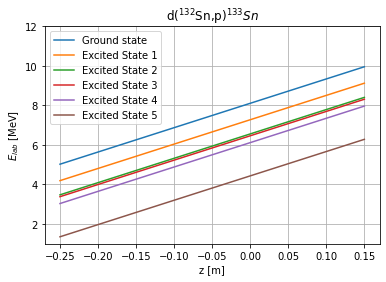

In [17]:
#You can edit the picture here.

z = py.arange(-0.25,0.20,0.1) #Range of z [m] values we plot

py.title(r"d($^{132}$Sn,p)$^{133}Sn$")
py.xlabel("z [m]")
py.ylabel(r"$E_{lab}$ [MeV]")
py.grid()

py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex1))
py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex2))
py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex3))
py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex4))
py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex5))
py.plot(z,E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z,E_ex6))

#Limits
py.ylim(1,12)

#Legend
py.legend(['Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4","Excited State 5"],loc="best")

py.savefig("1_Ideal.pdf")


## 2.- Inverse Kinematics: Kinematic compression.

The relation between the scattering angles in the Laboratory system and in the CMS in direct kinematics (when the projectile of the nuclear reaction is lighter than the target) is relatively straightforward to understand, but in inverse kinematics it might be a little more difficult to grasp. The purpose of this chapter is to allow the reader to perform some interesting transformations between this two frames. The reader may also observe the kinematic compression, characteristic of inverse kinematics reactions, which is on of the main motivations behind using solenoidal spectrometers.

The relation between the CMS scattering angle and the laboratory angle in a nuclear reaction is given by the following equation:

$$ \text{sin}(\theta_{lab}) = \frac{v_{0}}{v_{Lab}} \text{sin}(\theta_{CM})  $$

Where $v_0$ is the velocity in the CMS of the nucleus and $v_{Lab}$ is the velocity of that very same nucleus in the laboratory system. There are calculated with the functions defined below for both the ejectile and the recoil.

In [18]:
#Function that calculates the velocity [m/s] of the eyectile in the CMS (non-relativistic approach) in MeV:
def v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex):
    ECM = E_CM(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_e,y_e)
    v = py.sqrt(2*ECM/(m*6241506479963.2))
    return v

#Function that calculates the velocity [m/s] of the recoil in the CMS (non-relativistic approach) in MeV:
def v_0_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex):
    ECM = E_CM(x_p,y_p,x_t,y_t,x_p+x_t-x_e,y_p+y_t-y_e,E_beam,E_ex)
    m = mass(x_p+x_t-x_e,y_p+y_t-y_e)
    v = py.sqrt(2*ECM/(m*6241506479963.2))
    return v

#Function that calculates the velocity [m/s] of the eyectile in the Lab [m/s](non-relativistic approach) from the CM angle [º]:
def v_lab(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_e,y_e)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    v = py.sqrt(VCM**2 + v0**2 -2*VCM*v0*py.cos(thetaCM*py.pi/180))
    return v

#Function that calculates the velocity [m/s] of the recoil in the Lab (non-relativistic approach) from the CM angle [º]:
def v_lab_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    v0 = v_0_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_p+x_t-x_e,y_p+y_t-y_e)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    v = py.sqrt(VCM**2 + v0**2 -2*VCM*v0*py.cos(thetaCM*py.pi/180))
    return v

#Function that calculates the lab angle [º] from the CM angle [º] (non-relativistic approach) for the eyectile:
def theta_lab(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    if y_p > y_t:
        thetaCM = 180 - thetaCM
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    theta_lab =  py.arctan2(py.sin(thetaCM*py.pi/180),(py.cos(thetaCM*py.pi/180))+VCM/v0)*180/py.pi
    return theta_lab

#Function that calculates the lab angle [º] from the CM angle [º] (non-relativistic approach) for the recoil:
def theta_lab_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    if y_p < y_t:
        thetaCM = 180 - thetaCM
    v0 = v_0(x_p,y_p,x_t,y_t,x_p+x_t-x_e,y_p+y_t-y_e,E_beam,E_ex)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    theta_lab =  py.arctan2(py.sin(thetaCM*py.pi/180),(py.cos(thetaCM*py.pi/180))+VCM/v0)*180/py.pi
    return theta_lab

#Function that calculates the energy the eyectile in the Lab [MeV](non-relativistic approach) from the CM angle [º]:
def E_lab_theta(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    if y_p < y_t:
        thetaCM = 180-thetaCM
    v = v_lab(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM)
    m = mass(x_e,y_e)
    E = 0.5*m*(v**2)*6241506479963.2 #Jules to MeV
    return E

#Function that calculates the energy the recoil in the Lab [MeV](non-relativistic approach) from the CM angle [º]:
def E_lab_theta_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM):
    v = v_lab_R(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,thetaCM)
    m = mass(x_e,y_e)
    E = 0.5*m*(v**2)*6241506479963.2 #Jules to MeV
    return E


### Input 2.

In [37]:
P = py.array([4,11]) #Projectile of the exotic beam (Z,A)
T = py.array([1,2]) #Target (Z,A)
E = py.array([1,1]) #Ejectile produced in the reaction (Z,A)

E_beam = 10 #Energy in AMeV of the beam
E_ex1 = 0. #Excitation energy of the state 1 daughter nucleus [MeV]
E_ex2 = 2.1 #Excitation energy of the state 2 daughter nucleus  [MeV]
E_ex3 = 2.24 #Excitation energy of the state 3 daughter nucleus  [MeV]
E_ex4 = 4.56 #Excitation energy of the state 4 daughter nucleus  [MeV]
E_ex5 = 5.8 #Excitation energy of the state 5 daughter nucleus  [MeV]

theta1 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot
theta2 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot
theta3 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot
theta4 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot
theta5 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot
theta6 = py.arange(0.1,180,0.1) #Range of theta [º] values we plot

### Output 2.1: Scattering angles in CMS and Lab.

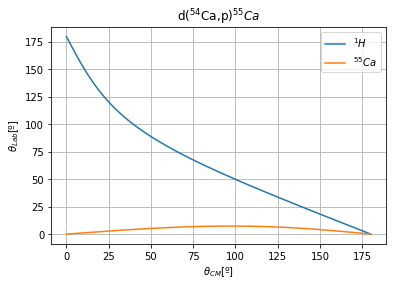

In [38]:
py.title(r"d($^{54}$Ca,p)$^{55}Ca$")
py.xlabel(r"$\theta_{CM}$[º]")
py.ylabel(r"$\theta_{Lab}$[º]")
py.grid()

py.plot(theta1,theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta1))
py.plot(theta1,theta_lab_R(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta1))

#Legend
py.legend([r"$^{1}H$",r"$^{55}Ca$"],loc="best")

py.savefig("2_1_Angles.pdf")

### Output 2.2: Kinematic Compression.

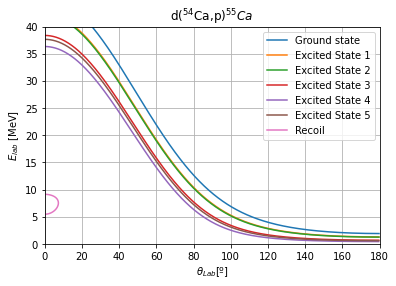

In [39]:
py.title(r"d($^{54}$Ca,p)$^{55}Ca$")
py.xlabel(r"$\theta_{Lab}$[º]")
py.ylabel(r"$E_{lab}$ [MeV]")
py.xlim(0,180)
py.ylim(0,40)
py.grid()

py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta1),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta1))
py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta2),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta2))
py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta3),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta3))
py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta4),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta4))
py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta5),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta5))
py.plot(theta_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex6,theta6),E_lab_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex6,theta6))

py.plot(theta_lab_R(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,0,theta1),E_lab_theta_R(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,0,theta1))

py.legend(['Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4","Excited State 5","Recoil"],loc="best")


py.savefig("2_2_Shift.pdf")

## 3.- Solenoidal Spectrometer: Limits of the Bore and radius of the detector.

In chapter 1, it is incorrectly assumed that all ejected particles, independently of the scattering angle with which they are emitted, return to the detector array and therefore are measured. This is not true if the ejectile reaches the walls of the detector, which are located at a radius R from the z-axis. The condition for the ejected nucleus to not reach this radius R is expressed mathematically as:

$$ E_{lab} \le \frac{1}{8m} \left(\frac{qeBR}{\text{sin}(\theta_{lab})}\right)^2$$

We also have assumed that the particles will reach the detector at $\rho$ = 0, being $\rho$ the radial coordinate of the  cylindrical solenoid, but we also have to take into account the radius of the detector array $r_{0}$ (this is an approximation, since for instance in ISS is an hexagonal silicon array). This will specially affect those light ejectiles with big $\theta_{CM}$ (small $\theta_{Lab}$) since particles will be detected before they can complete their cyclotron period. The actual particle return distance is given by the following expression (Ref [2]):

$$ z = (v_0 \text{cos}(\theta_{CM}) + V_{CM}) \frac{r \left[ 2 \pi - 2 \text{arcsin} \left( \frac{r_0}{2r} \right) \right]}{v_0 \text{sin}(\theta_{CM})} $$

Where we have that $v_0$ is the particle velocity in the CMS, which can be obtained from the CMS energy $E_{CM}$. We also have the radius of the cyclotron orbit r, which is calculated as follows:

$$ r = \frac{m v_0 \text{sin}(\theta_{CM})}{q e B}$$

The component of the velocity of a scattered ejectile along the beam axis is given by:

$$ v_{||} = V_{CM} + v_0 \text{cos}(\theta_{CM}) $$

With this velocity we can calculate the relation between the scattering angle in the CMS and Z:

$$ z = v_{||} T_{cyc} $$

Which can be found as an output in this chapter. 

In [40]:
#Function that calculates the longitudinal velocity [m/s] (non relativistic approach) of the ejected particle:
def v_l(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM):
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    v = VCM + v0 * py.cos(theta_CM*py.pi/180)
    return v

#Function that calculates z[m] as a function of the center of mass angle:
def z(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,theta_CM):
    theta_CM = 180 - theta_CM
    t = Time(x_e,y_e,B) 
    vl = v_l(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM)
    out = t*vl 
    return out

#Function that calculates the cyclotron radius r[m] of the ejectile in a field B for a certain CM angle:
def r(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,theta_CM):
    m = mass(x_e,y_e)
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    z = (m*v0*py.sin(theta_CM*py.pi/180)/(B*x_e*e))
    return z

#Function that calculates z[m] for a detector of certain thickness r0 [mm].
def z_real(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,r0,theta_CM):
    theta_CM = 180 - theta_CM
    vl = v_l(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM)
    R = r(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,theta_CM)
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    r0 = r0/1000
    out = (vl*R/(v0*py.sin(theta_CM*py.pi/180)))*(2*py.pi-2*py.arcsin(r0/(2*R)))  
    return out

#Function that calculates the energy [MeV] of the ejectile in the Lab for a certain detector radius r0 [mm]:
def E_lab(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,B,z,r0,E_ex,theta_CM):
    theta_CM = 180 - theta_CM
    ECM = E_CM(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_e,y_e)
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    E0 = 0.5*m*(VCM)**2*6.242*10**12
    t = Time(x_e,y_e,B)
    vl = v_l(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM)
    h = ECM - E0 + m*(VCM)*vl*6241506479963.2
    return h


#Function that calculates the CMS angle limit [º] for a certain reaction:
def Bore_theta(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,R_B):
    r = R_B/2.
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    m = mass(x_e,y_e)
    thetalim = 180*py.arcsin(x_e*e*B*r/(m*v0))/py.pi
    return thetalim

#Function that calculates the Lab energy [MeV] for reaching the Bore:
def Bore_Energy(x_e,y_e,B,theta_lab,R_B):
    m = mass(x_e,y_e)
    out = 1/(8*m)*(e*x_e*B*R_B/py.sin(theta_lab*py.pi/180))**2*6241506479963.2
    return out

#Function that calculates the z [m] for the Bore_Energy function:
def Bore_z(x_e,y_e,B,theta_lab,R_B):
    Elab = Bore_Energy(x_e,y_e,B,theta_lab,R_B)/6241506479963.2 
    m = mass(x_e,y_e)
    vlab = py.sqrt(2*Elab/m)
    T = Time(x_e,y_e,B)
    z = vlab*py.cos(theta_lab*py.pi/180)*T
    return z

#Function that calculates z[m] of the ejectile as a function of time [s] for a particular CMS angle:
def z_t(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM,t):
    if y_p > y_t:
        theta_CM = 180 - theta_CM
    VCM = V_CM(x_p,y_p,x_t,y_t,E_beam)
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    z = (VCM + v0*py.cos(theta_CM*py.pi/180))*t
    return z

#Function that calculates rho[m] of the ejectile as a function of time [s] for a particular CMS angle: 
def rho_t(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,theta_CM,t):
    radius = r(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex,B,theta_CM)
    v0 = v_0(x_p,y_p,x_t,y_t,x_e,y_e,E_beam,E_ex)
    omega = v0*py.sin(theta_CM*py.pi/180)/radius 
    rho = radius + radius*py.sin(omega*t-(py.pi/2))
    return rho


### Input 3.

In [54]:
P = py.array([4,11]) #Projectile of the exotic beam (Z,A)
T = py.array([1,2]) #Target (Z,A)
E = py.array([1,1]) #Ejectile produced in the reaction (Z,A)

E_beam = 10 #Energy in AMeV of the beam
B = 2.3 #Intensity of the magnetic field in Tesla.
r0 = 25. #mm radius of the silicon array
R_B = 0.462 #m Radius of the Bore 

#Angles for Output 3.3
theta_CM_1_3 = 35
theta_CM_2_3 = 10

E_ex1 = 0. #Excitation energy of the state 1 daughter nucleus [MeV]
E_ex2 = 2.1 #Excitation energy of the state 2 daughter nucleus  [MeV]
E_ex3 = 2.24 #Excitation energy of the state 3 daughter nucleus  [MeV]
E_ex4 = 4.56 #Excitation energy of the state 4 daughter nucleus  [MeV]
E_ex5 = 5.8 #Excitation energy of the state 5 daughter nucleus  [MeV]b

### Output 3.1: CM scattering angle vs Z.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin


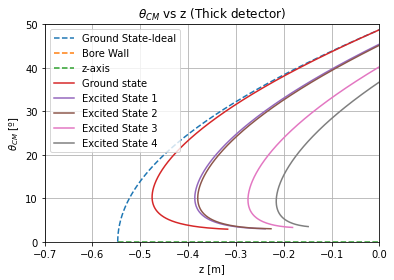

In [55]:
py.title(r"$\theta_{CM}$ vs z (Thick detector)")
py.xlabel("z [m]")
py.ylabel(r"$\theta_{CM}$ [º]")
py.grid()
py.xlim(-0.7,0.)
py.ylim(0,50)

theta_CM = py.arange(0,80,0.1) #Range of z [m] values we plot
thetalima = Bore_theta(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,R_B)*py.ones(len(theta_CM))#Limit for the CM
thetatest = 0
thetatest = thetatest*py.ones(len(theta_CM))#Limit for the CM [º]
theta_CM_1 = py.arange(2.2,77,0.1) #Range of z [m] values we plot
theta_CM_2 = py.arange(2.2,77,0.1) #Range of z [m] values we plot
theta_CM_3 = py.arange(2.2,76,0.1) #Range of z [m] values we plot
theta_CM_4 = py.arange(2.2,75,0.1) #Range of z [m] values we plot
theta_CM_5 = py.arange(2.2,74,0.1) #Range of z [m] values we plot

py.plot(z(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,theta_CM),theta_CM, "--")
py.plot(z(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,theta_CM),thetalima, "--")
py.plot(z(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,theta_CM),thetatest, "--")
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,r0,theta_CM_1),theta_CM_1)
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,B,r0,theta_CM_2),theta_CM_2)
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,B,r0,theta_CM_3),theta_CM_3)
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,B,r0,theta_CM_4),theta_CM_4)
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,B,r0,theta_CM_5),theta_CM_5)

py.legend(["Ground State-Ideal","Bore Wall","z-axis",'Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4","Excited State 5"],loc="best")

py.savefig("CM_vs_Z.pdf")


### Output 3.2: Lab energy vs Z.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in arcsin


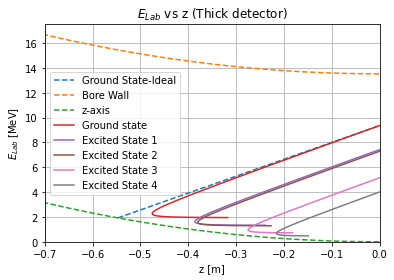

In [56]:
py.title(r"$E_{Lab}$ vs z (Thick detector)")
py.xlabel("z [m]")
py.ylabel(r"$E_{Lab}$ [MeV]")
py.grid()
py.xlim(-0.7,0.)
py.ylim(0,17.5)

theta_Lab = py.arange(0.1,179.99,0.1)
theta_CM = py.arange(0.1,58,0.1) #Range of z [m] values we plot
theta_CM_1 = py.arange(1.7,157,0.1) #Range of z [m] values we plot
theta_CM_2 = py.arange(1.7,157,0.1) #Range of z [m] values we plot
theta_CM_3 = py.arange(1.7,156,0.1) #Range of z [m] values we plot
theta_CM_4 = py.arange(1.7,155,0.1) #Range of z [m] values we plot
theta_CM_5 = py.arange(1.7,154,0.1) #Range of z [m] values we plot
za = py.arange(-1,0,0.01)

#Ideal case for the first excited energy defined in the input
py.plot(z(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,theta_CM),E_lab_ideal(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,theta_CM),E_ex1), "--")

#Upper limit given by the Bore.
py.plot(Bore_z(E[0],E[1],B,theta_Lab,R_B),Bore_Energy(E[0],E[1],B,theta_Lab,R_B),"--")

#Lower limit given by the theta_CM = 0.
py.plot(Bore_z(E[0],E[1],B,theta_Lab,0.005),Bore_Energy(E[0],E[1],B,theta_Lab,0.005),"--")


py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,r0,theta_CM_1),E_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,B,r0,theta_CM_1),r0,E_ex1,theta_CM_1))
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,B,r0,theta_CM_2),E_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,B,r0,theta_CM_2),r0,E_ex2,theta_CM_2))
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,B,r0,theta_CM_3),E_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,B,r0,theta_CM_3),r0,E_ex3,theta_CM_3))
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,B,r0,theta_CM_4),E_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,B,r0,theta_CM_4),r0,E_ex4,theta_CM_4))
py.plot(z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,B,r0,theta_CM_5),E_lab(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,B,z_real(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,B,r0,theta_CM_5),r0,E_ex5,theta_CM_5))

py.legend(["Ground State-Ideal","Bore Wall","z-axis",'Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4","Excited State 5"],loc="best")

py.savefig("3_2_ELab_vs_Z.pdf")

### Output 3.3: Trajectory of the ejectiles.

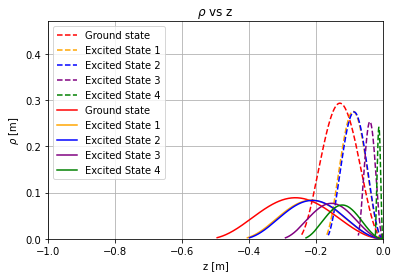

In [57]:
py.title(r"$\rho$ vs z")
py.xlabel("z [m]")
py.ylabel(r"$\rho$ [m]")
py.grid()

t = py.arange(0,0.95*Time(E[0],E[1],B),0.0000000001)

py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta_CM_1_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta_CM_1_3,t),"--", color="red")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta_CM_1_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta_CM_1_3,t),"--", color="orange")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta_CM_1_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta_CM_1_3,t),"--", color="blue")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta_CM_1_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta_CM_1_3,t),"--", color="purple")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta_CM_1_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta_CM_1_3,t),"--", color="green")


py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta_CM_2_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex1,theta_CM_2_3,t), color="red")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta_CM_2_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex2,theta_CM_2_3,t), color="orange")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta_CM_2_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex3,theta_CM_2_3,t), color="blue")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta_CM_2_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex4,theta_CM_2_3,t), color="purple")
py.plot(z_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta_CM_2_3,t),rho_t(P[0],P[1],T[0],T[1],E[0],E[1],E_beam,E_ex5,theta_CM_2_3,t), color="green")

py.xlim(-01.0,0)
py.ylim(0,0.47)

py.legend(['Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4",'Ground state',"Excited State 1","Excited State 2","Excited State 3","Excited State 4"],loc="best")

py.savefig("3_3_rho_vs_Z.pdf")


In [58]:
Time(1,1,2.3)

2.8519336889326705e-08